In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!mkdir ~/.kaggle
#!cd ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"samuellawrence","key":"9c03886652928f9231ab214e46bffed3"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 82.4MB/s]


In [4]:
import zipfile

zf = zipfile.ZipFile('hotel-booking-demand.zip') 
df = pd.read_csv(zf.open('hotel_bookings.csv'))

In [5]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
26224,Resort Hotel,0,185,2016,July,29,15,3,7,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,240.0,NaN,0,Transient,138.01,0,2,Check-Out,2016-07-25
73457,City Hotel,1,173,2017,August,34,22,2,7,3,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,202.50,0,0,Canceled,2017-03-14
49910,City Hotel,1,265,2016,April,17,20,0,4,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,30.0,NaN,0,Transient,101.00,0,0,Canceled,2015-07-30
20209,Resort Hotel,0,0,2016,January,4,19,0,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,142.0,NaN,0,Transient,37.00,0,0,Check-Out,2016-01-20
67053,City Hotel,1,46,2017,April,17,28,0,1,1,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,117.00,0,0,Canceled,2017-03-23


Glossery terms: https://www.sciencedirect.com/science/article/pii/S2352340918315191#ec0006





In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Almost all the company values are missing 

In [8]:
df.isnull().sum().sort_values(ascending=False).head(5)

company      112593
agent         16340
country         488
children          4
lead_time         0
dtype: int64

In [9]:
df = df.drop(['company'], axis=1)
df = df.drop(['agent'], axis=1) # Testing Results with removing agent entirely
df = df.fillna(df['children'].median()) 

In [10]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
118942,City Hotel,0,9,2017,August,34,25,0,2,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,140.0,0,1,Check-Out,2017-08-27
118643,City Hotel,0,184,2017,August,34,20,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,126.0,0,0,Check-Out,2017-08-24
111643,City Hotel,0,120,2017,May,19,11,0,3,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,89.1,0,0,Check-Out,2017-05-14
93033,City Hotel,0,95,2016,July,29,13,0,3,2,1.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,121.5,0,2,Check-Out,2016-07-16
52558,City Hotel,1,26,2016,June,24,8,0,1,2,0.0,0,BB,PRT,Offline TA/TO,Corporate,0,0,0,A,A,0,No Deposit,0,Transient-Party,120.0,0,0,Canceled,2016-06-02


In [11]:
# List uniquie values 
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name hotel and unique values are 2
Column name is_canceled and unique values are 2
Column name lead_time and unique values are 479
Column name arrival_date_year and unique values are 3
Column name arrival_date_month and unique values are 12
Column name arrival_date_week_number and unique values are 53
Column name arrival_date_day_of_month and unique values are 31
Column name stays_in_weekend_nights and unique values are 17
Column name stays_in_week_nights and unique values are 35
Column name adults and unique values are 14
Column name children and unique values are 5
Column name babies and unique values are 5
Column name meal and unique values are 5
Column name country and unique values are 178
Column name market_segment and unique values are 8
Column name distribution_channel and unique values are 5
Column name is_repeated_guest and unique values are 2
Column name previous_cancellations and unique values are 15
Column name previous_bookings_not_canceled and unique values are 73

In [15]:
df_cat = df[['hotel','is_canceled','arrival_date_year','arrival_date_month','stays_in_weekend_nights','adults','children','babies','meal','market_segment','distribution_channel','is_repeated_guest',
             'previous_cancellations','reserved_room_type','assigned_room_type','booking_changes','deposit_type','customer_type','required_car_parking_spaces','total_of_special_requests','reservation_status']]

graph for hotel: total = 2


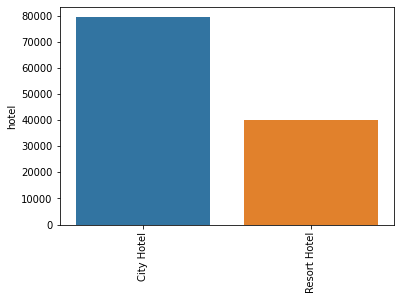

graph for is_canceled: total = 2


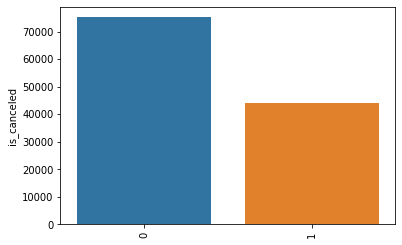

graph for arrival_date_year: total = 3


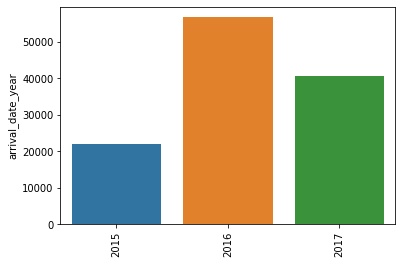

graph for arrival_date_month: total = 12


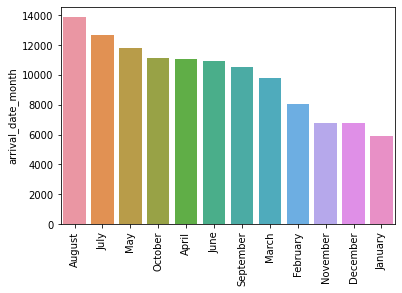

graph for stays_in_weekend_nights: total = 17


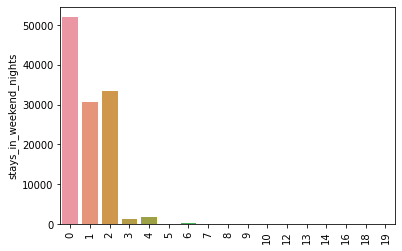

graph for adults: total = 14


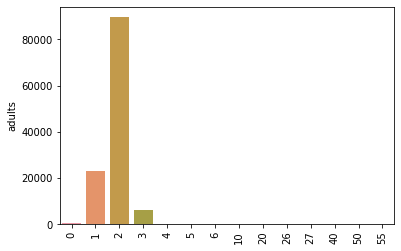

graph for children: total = 5


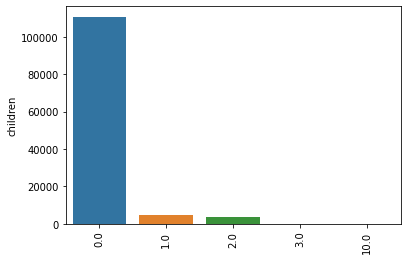

graph for babies: total = 5


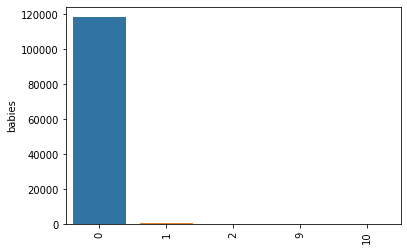

graph for meal: total = 5


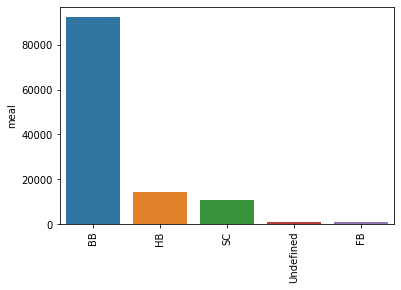

graph for market_segment: total = 8


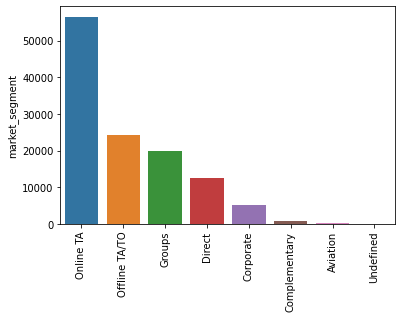

graph for distribution_channel: total = 5


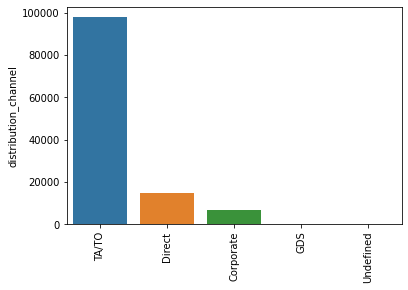

graph for is_repeated_guest: total = 2


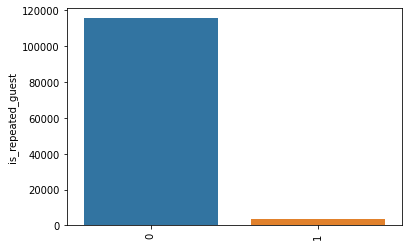

graph for previous_cancellations: total = 15


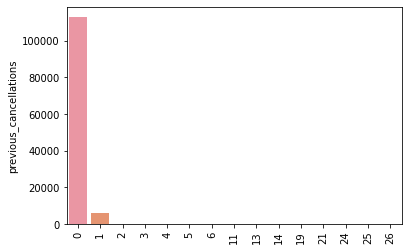

graph for reserved_room_type: total = 10


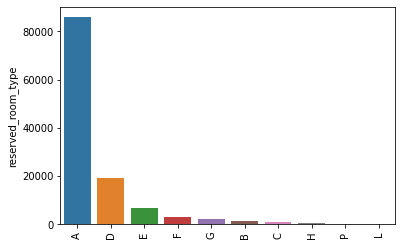

graph for assigned_room_type: total = 12


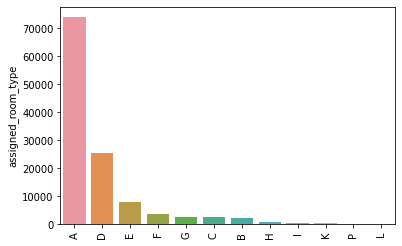

graph for booking_changes: total = 21


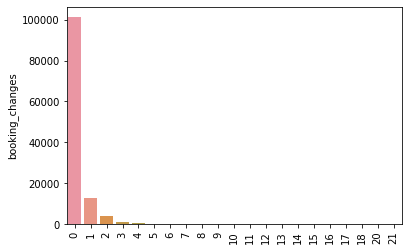

graph for deposit_type: total = 3


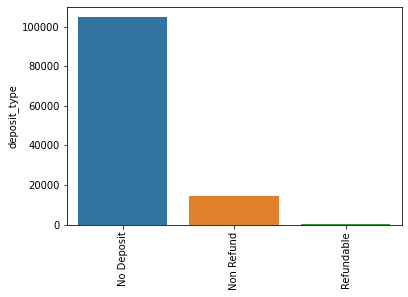

graph for customer_type: total = 4


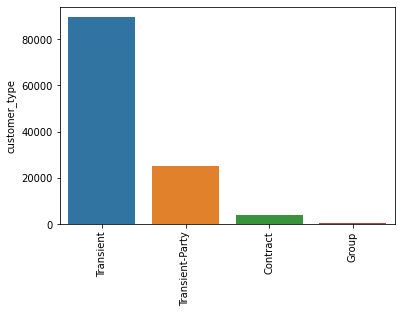

graph for required_car_parking_spaces: total = 5


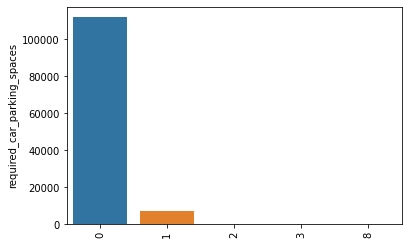

graph for total_of_special_requests: total = 6


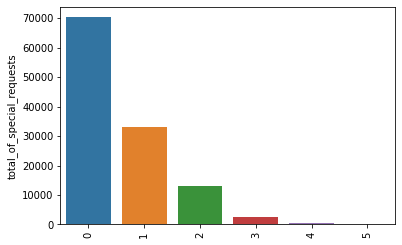

graph for reservation_status: total = 3


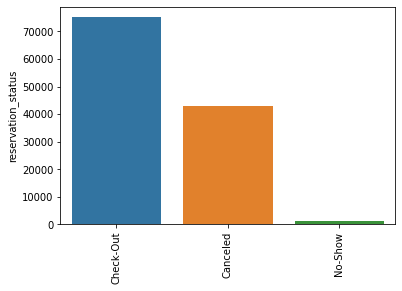

In [16]:
for Categorical_Values in df_cat.columns:
    cat_num = df_cat[Categorical_Values].value_counts()
    print('graph for %s: total = %d' % (Categorical_Values, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Key findings: 


*   Most ofthe data consits of City Hotels vs Resort hotels
*   From the dataMost guests did not cancel their booking 
*   Most of the data is from 2016 with 2017 being the second most popular year
*   The summer months are the biggest travel periods with winter months being the least popular
*   Most guests did not stay during the weekends
*   Most Adults booked in pairs
*   Most booking did not include children 
*   The most popular meal booked was the Bed and breakfast with Half board and No meal package being the 2nd most popular
*   Online Travel agents were the most popular market segments as well as the most popular distribution channel
*   An overwelming majority of guests were not repeat guests
*   An overwelming minority of guests did not previously cancel or change their booking
*   Room A was the most popular room booked (room types are annoymus)
*   Majority of the time a deposite was not required
*   Most customers booking were independent of groups or contract
*   At least 50% of guests had at least one special request





In [17]:
#Classify Months
Months={
'January': 1 ,
'February': 2,
'March': 3,
'April': 4,
'May' : 5,
'June': 6,
'July': 7,
'August': 8,
'September': 9,
'October': 10,
'November': 11,
'December': 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(Months)

In [18]:
df.sample(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
90658,City Hotel,0,118,2016,6,24,6,1,2,1,0.0,0,BB,POL,Offline TA/TO,Corporate,0,0,0,A,A,0,No Deposit,0,Transient-Party,110.0,0,0,Check-Out,2016-06-09


In [19]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
df['hotel'] = df['hotel'].astype('str')
df['meal'] = df['meal'].astype('str')
df['country'] = df['country'].astype('str')
df['market_segment'] = df['market_segment'].astype('str')
df['distribution_channel'] = df['distribution_channel'].astype('str')
df['reserved_room_type'] = df['reserved_room_type'].astype('str')
df['assigned_room_type'] = df['assigned_room_type'].astype('str')
df['deposit_type'] = df['deposit_type'].astype('str')

df['customer_type'] = df['customer_type'].astype('str')
df['reserved_room_type'] = df['reserved_room_type'].astype('str')
df['reservation_status'] = df['reservation_status'].astype('str')
df['reservation_status_date'] = df['reservation_status_date'].astype('str')

In [22]:
#model = df [['hotel','lead_time','arrival_date_year','arrival_date_month']]

In [23]:
y = df.is_canceled
X = df.drop('is_canceled', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [25]:
rfc = RandomForestRegressor()

In [26]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['hotel','meal',
                               'country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reserved_room_type',
                               'reservation_status','reservation_status_date']),
    remainder='passthrough')

In [27]:
column_trans.fit_transform(X)

<119390x1184 sparse matrix of type '<class 'numpy.float64'>'
	with 2540523 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.pipeline import make_pipeline

In [29]:
pipe = make_pipeline(column_trans, rfc)

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

1.0

In [32]:
X_new = X.sample(5, random_state=99)
X_new.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
429,Resort Hotel,57,2015,7,29,15,0,2,2,0.0,0,FB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,0,Transient-Party,107.0,0,0,Check-Out,2015-07-17
11165,Resort Hotel,203,2017,4,17,25,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,90.0,0,0,Canceled,2017-01-06
21043,Resort Hotel,83,2016,2,7,9,2,5,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,26.0,0,0,Check-Out,2016-02-16
22591,Resort Hotel,0,2016,10,42,10,1,0,1,0.0,0,BB,PRT,Online TA,TA/TO,1,0,0,A,A,0,No Deposit,0,Transient-Party,56.0,0,1,Check-Out,2016-10-11
54136,City Hotel,187,2016,7,28,7,0,2,0,2.0,0,BB,GBR,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,0,Transient-Party,86.5,0,0,Canceled,2016-02-20


In [33]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['hotel', 'meal', 'country',
                                                   'market_segment',
                                                   'distribution_chann...
                 RandomForestRegressor(b

In [34]:
pipe.predict(X_new)

array([0., 1., 0., 0., 1.])

Our model scored 100% based all imputs, after furter investigation into other kaggle data sets to compare results user Susmit Vengurlekar has pointed out that non_refund and is canceled are highly correlated in dons't take into account the rest of the data set. 

<function matplotlib.pyplot.show>

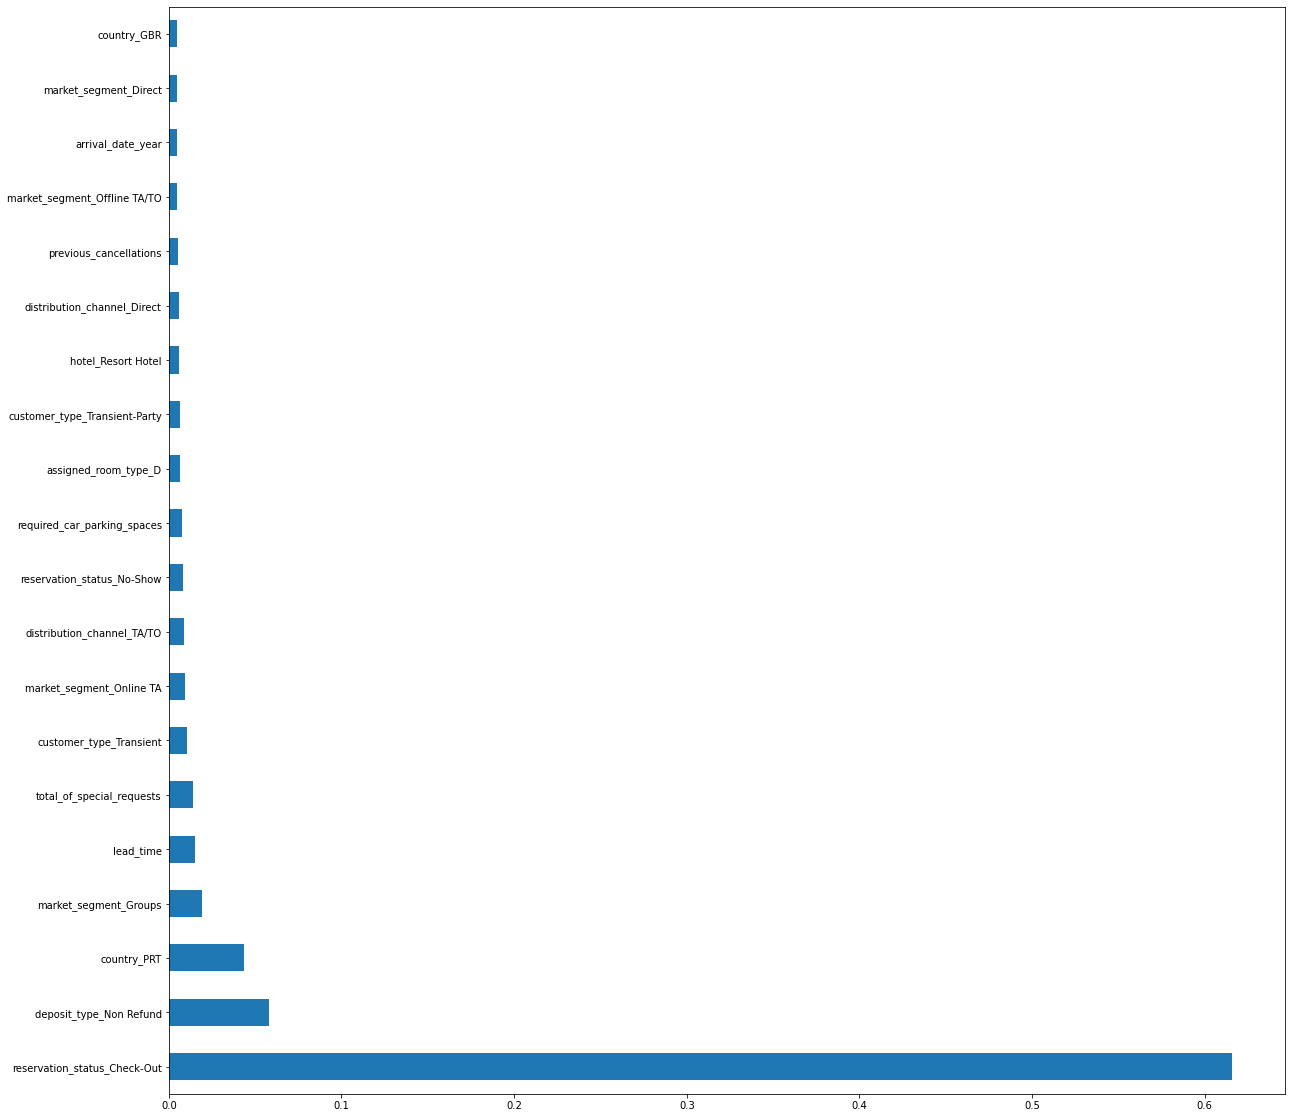

In [35]:
Top_Features = pd.get_dummies(df, drop_first=True)

y = Top_Features.is_canceled
X = Top_Features.drop('is_canceled', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

#feature selection using ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
#plot graph to show importance 
plt.figure(figsize=(20,20))
feat_imp = pd.Series(model.feature_importances_, index = X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show

Surprisingly, booking changes did not make the list

In order to avoid Multicollinearity, we will be using the other top 10 features to predict is_canceled

In [45]:
Model_2 = df[['country','total_of_special_requests','market_segment','distribution_channel','customer_type','hotel','arrival_date_year','arrival_date_month','assigned_room_type','reserved_room_type','is_canceled']]

In [37]:
Model_2.head()

,country,total_of_special_requests,market_segment,distribution_channel,customer_type,hotel,arrival_date_year,arrival_date_month,assigned_room_type,reserved_room_type,is_canceled
0,PRT,0,Direct,Direct,Transient,Resort Hotel,2015,7,C,C,0
1,PRT,0,Direct,Direct,Transient,Resort Hotel,2015,7,C,C,0
2,GBR,0,Direct,Direct,Transient,Resort Hotel,2015,7,C,A,0
3,GBR,0,Corporate,Corporate,Transient,Resort Hotel,2015,7,A,A,0
4,GBR,1,Online TA,TA/TO,Transient,Resort Hotel,2015,7,A,A,0


In [38]:
y = Model_2.is_canceled
Z = Model_2.drop('is_canceled', axis=1)
X_train, X_test, y_train, y_test = train_test_split(Z, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [53]:
column_trans2 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['country','market_segment','distribution_channel','customer_type','hotel','assigned_room_type','reserved_room_type']),
    remainder='passthrough')

In [54]:
column_trans2.fit_transform(Z)

<119390x222 sparse matrix of type '<class 'numpy.float64'>'
	with 1123582 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [58]:
pipe2 = make_pipeline(column_trans2, clf)

In [60]:
cross_val_score(pipe2, X_train, y_train, cv=10, n_jobs=-1,).mean()

0.8143164771173776

The perpose of this model is to show how multicollinearity effects our models and how we can tweek them to get a better understanding